# pySand 1.5
##### Erosion examples

Available erosion models:
- bend: Bend
- tee: Blinded tee
- straight_pipe: Smooth and straight pipes
- welded_joint: Welded joints
- manifold: Manifold (pending release in DNVGL RP-O501)
- reducer: Reducer
- probes: Erosion probes
- flexible: Flexible
- choke_gallery: Choke gallery

In [1]:
from pysand.erosion import bend, reducer, erosion_rate, materials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Single point relative erosion rate calculation

Input parameters:

In [2]:
v_m = 17  # Mix velocity [m/s]
rho_m = 100  # Mix density [kg/m3]
mu_m = 1e-3  # Mix viscosity [kg/ms]
R = 3  # Bend-radius [# ID's]
GF = 2  # Geometry factor [-]
D = .12  # Pipe diameter [m]
d_p = .2  # Particle diameter [mm]

Bend relative erosion rate [mm/ton]:

In [3]:
bend(v_m, rho_m, mu_m, R, GF, D, d_p)

0.02512124119544143

Reducer erosion:

In [4]:
D2 = .1  # Downstream pipe diameter [m]
Q_s = 1.5  # Sand production rate [g/s]
E = reducer(v_m, rho_m, D, D2, d_p, GF=GF, alpha=20)
E_rate = erosion_rate(E, Q_s)
print('Relative erosion rate: ', np.round(E, 2), ' mm/ton')
print('Absolute erosion rate: ', np.round(E_rate, 2), ' mm/year')

Relative erosion rate:  0.04  mm/ton
Absolute erosion rate:  1.78  mm/year


### Materials

Different materials can be specified with the materials argument for the Bend, Blinded tee, Welded joints, Manifold, Reducer, Erosion probe, Flexible and Choke gallery erosion models. The default material is Duplex steel for all models except the choke gallery model where DC-05 Tungsten Carbide is default.

In [5]:
materials()

--------------------
Available materials:
--------------------


['carbon_steel',
 'duplex',
 'ss316',
 'inconel',
 'grp_epoxy',
 'grp_vinyl_ester',
 'hdpe',
 'aluminium',
 'dc_05_tungsten',
 'cs_10_tungsten',
 'cr_37_tungsten',
 '95_alu_oxide',
 '99_alu_oxide',
 'psz_ceramic_zirconia',
 'ZrO2-Y3_ceramic_zirconia',
 'SiC_silicon_carbide',
 'Si3N4_silicon_nitride',
 'TiB2_titanium_diboride',
 'B4C_boron_carbide',
 'SiSiC_ceramic_carbide']

In [6]:
for mat in ['carbon_steel', 'duplex', 'dc_05_tungsten', 'aluminium']:
    print(mat, ': ', np.round(bend(v_m, rho_m, mu_m, R, GF, D, d_p, material=mat), 3), ' mm/ton')

carbon_steel :  0.025  mm/ton
duplex :  0.025  mm/ton
dc_05_tungsten :  0.0  mm/ton
aluminium :  0.091  mm/ton


### Project erosion prediction

Creating some example data (can be imported from csv etc):

In [7]:
df = pd.DataFrame({'v_m': [14.2, 14.5, 15.7, 18.2, 19.9, 20.8, 20.3],
                   'rho_m': [300, 290, 290, 280, 230, 400, 450]},
                   index=list(range(2023, 2030)))
df

,v_m,rho_m
2023,14.2,300
2024,14.5,290
2025,15.7,290
2026,18.2,280
2027,19.9,230
2028,20.8,400
2029,20.3,450


Applying bend erosion model on every row in dataset (every year) and cumulative function:

In [8]:
df['rel_erosion'] = df.apply(lambda row: bend(row['v_m'], row['rho_m'], mu_m, R, GF, D, d_p), axis=1)
df['abs_erosion'] = df.apply(lambda row: erosion_rate(row['rel_erosion'], Q_s), axis=1)
df['cum_erosion'] = df['abs_erosion'].cumsum()
df

,v_m,rho_m,rel_erosion,abs_erosion,cum_erosion
2023,14.2,300,0.007430,0.351722,0.351722
2024,14.5,290,0.008060,0.381549,0.733271
2025,15.7,290,0.010027,0.474650,1.207921
2026,18.2,280,0.015422,0.730000,1.937921
2027,19.9,230,0.022647,1.072020,3.009941
2028,20.8,400,0.017133,0.810993,3.820934
2029,20.3,450,0.014682,0.694982,4.515916


In [9]:
print('Total erosion:', np.round(df['abs_erosion'].sum(), 2), 'mm')

Total erosion: 4.52 mm


Plotting the results:

Text(0.5, 1.0, 'Erosion prediction for Lorem Ipsum')

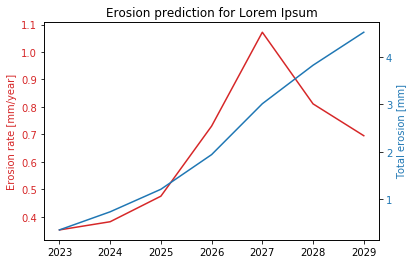

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(df['abs_erosion'], label='erosion rate', color=color)
ax1.set_ylabel('Erosion rate [mm/year]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(df['cum_erosion'], label='cumulative erosion', color=color)
ax2.set_ylabel('Total erosion [mm]', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Erosion prediction for Lorem Ipsum')

Sand rate sensitivity study

Text(0.5, 1.0, 'Erosion rates - sand rate sensitivity')

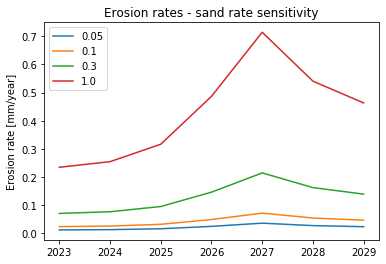

In [11]:
sand_rates = [0.05, 0.1, 0.3, 1.0]

for Q_s in sand_rates:
    plt.plot(df.apply(lambda row: erosion_rate(row['rel_erosion'], Q_s), axis=1), label=Q_s)
plt.legend()
plt.ylabel('Erosion rate [mm/year]')
plt.title('Erosion rates - sand rate sensitivity')